In [2]:
import scipy as sp
import scipy.optimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import SGDRegressor

In [3]:
def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

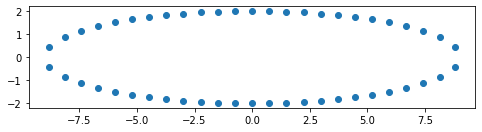

In [21]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure(figsize=(8,3))
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [38]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

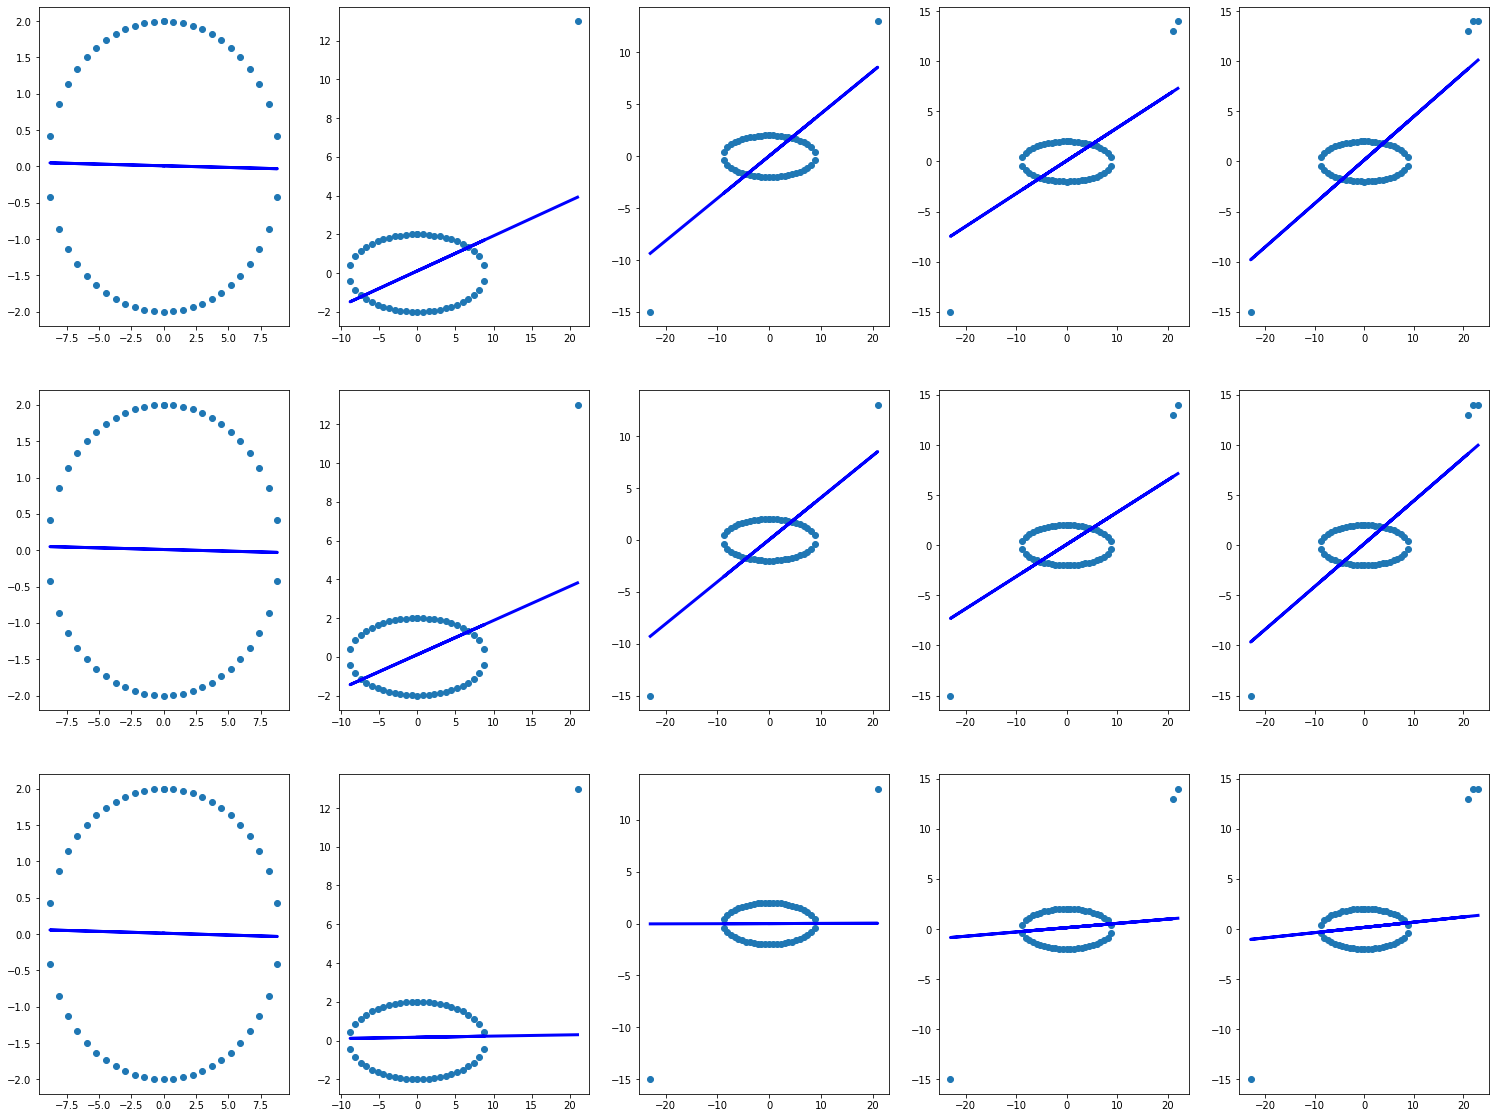

In [74]:
plt.rcParams['figure.figsize'] = (26,20)
f,ax = plt.subplots(3,5)
a=0
for i in [0.000001, 1, 100]:
    b=0
    x,y=X,Y
    for j in [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]:
        x = np.append(x,j[0])
        y = np.append(y,j[1])
        regg = SGDRegressor(alpha=i, eta0=0.001, learning_rate='constant',random_state=99).fit(x.reshape(-1, 1),y)
        plt.sca(ax[a][b])
        pred = regg.predict(x.reshape(-1, 1))
        plt.scatter(x,y)
        plt.plot(x,pred, color='blue', linewidth=3)
        b=b+1
    a=a+1
plt.show()
    

- ### Here I have made the outliers closer to the dataset, so that we can observe the diveation in the regression line after adding each outlies.

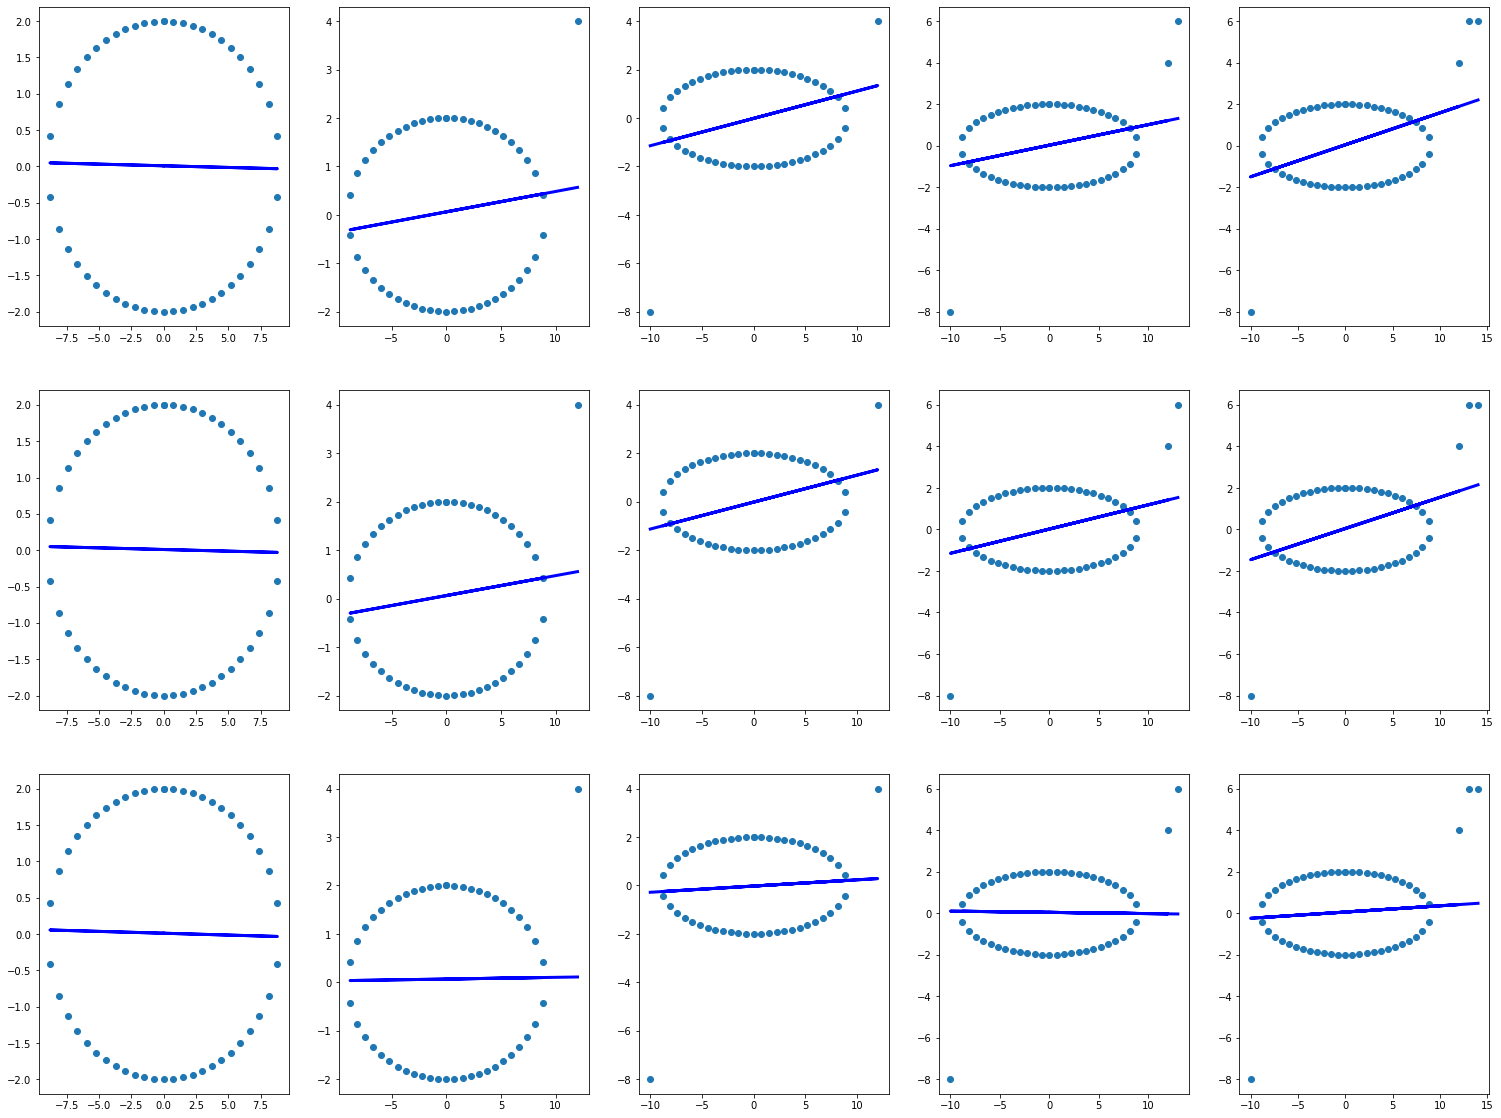

In [73]:
plt.rcParams['figure.figsize'] = (26,20)
f,ax = plt.subplots(3,5)
a=0
for i in [0.000001, 1, 100]:
    b=0
    x,y=X,Y
    for j in [(0,2),(12, 4), (-10, -8), (13,6), (14,6)]:
        x = np.append(x,j[0])
        y = np.append(y,j[1])
        regg = SGDRegressor(alpha=i, eta0=0.001, learning_rate='constant',random_state=99).fit(x.reshape(-1, 1),y)
        plt.sca(ax[a][b])
        pred = regg.predict(x.reshape(-1, 1))
        plt.scatter(x,y)
        plt.plot(x,pred, color='blue', linewidth=3)
        b=b+1
    a=a+1
plt.show()
    

## Observations
- Here we can clearly conclude that as we increase the intensity of regularization, the model becomes more and more susceptible to OUTLIERS 